In [1]:
import pandas as pd
import seaborn as sns

#### 1. Attendance Data

Load the attendance.csv file and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:


name  
Billy    0.5250  
Jane     0.6875  
John     0.9125  
Sally    0.7625  
Name: grade, dtype: float64

In [2]:
df = pd.read_csv('untidy-data/attendance.csv')

In [3]:
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [5]:
# melt the dataframe

df_melt = df.melt(id_vars='Unnamed: 0',var_name = 'day', value_name='grade')
df_melt

,Unnamed: 0,day,grade
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [6]:
# rename the columns

df_melt.columns = ['student', 'day', 'grade']
df_melt.head()

,student,day,grade
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [7]:
# function which will convert letter grades in numbers

def letter_grade(a):
    if a == 'P':
        return 1
    elif a == 'H':
        return 0.5
    elif a == 'T':
        return 0.9
    else:
        return 0

In [8]:
# apply the functions to the dataframe

df_melt['num_grade'] = df_melt['grade'].apply(letter_grade)

In [9]:
df_melt.head()

,student,day,grade,num_grade
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9


In [10]:
# use groupby to calculate mean grade

df_melt.groupby('student').num_grade.mean()

student
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: num_grade, dtype: float64

In [11]:
# Another way (use .replace)

df1 = df_melt.replace({'P': 1, 'A': 0, 'H': 0.5, 'T': 0.9})
df1.head()

,student,day,grade,num_grade
0,Sally,2018-01-01,1.0,1.0
1,Jane,2018-01-01,0.0,0.0
2,Billy,2018-01-01,0.0,0.0
3,John,2018-01-01,1.0,1.0
4,Sally,2018-01-02,0.9,0.9


In [12]:
#groupby student and find mean of 'value'
df1.groupby('student').grade.mean()

student
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64

### 2.Coffee Levels

Read the coffee_levels.csv file.  
Transform the data so that each carafe is in it's own column.  
Is this the best shape for the data?   

In [13]:
df = pd.read_csv('untidy-data/coffee_levels.csv')

In [14]:
df

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


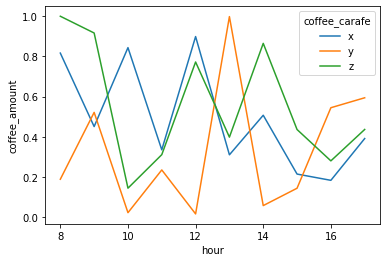

In [15]:
# plot data
sns.lineplot(x = 'hour',
             y = 'coffee_amount',
             data = df,
             hue = 'coffee_carafe'
);

In [16]:
# Lets pivot the table
df_pivot = df.pivot_table(index = ['hour'],
                    columns = 'coffee_carafe',
                    values = 'coffee_amount').reset_index()

df_pivot

coffee_carafe,hour,x,y,z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


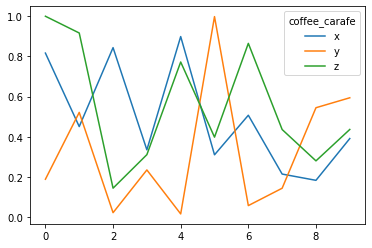

In [17]:
df_pivot[['x','y', 'z']].plot();

#### 3. Cake Recipes  

Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.  
Tidy the data as necessary.  
Which recipe, on average, is the best? recipe b  
Which oven temperature, on average, produces the best results? 275  
Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees  

In [18]:
df = pd.read_csv('untidy-data/cake_recipes.csv')

In [19]:
df.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [20]:
df.columns

Index(['recipe:position', '225', '250', '275', '300'], dtype='object')

In [21]:
# split the 'recipe:position' column
df['recipe:position'].str.split(":", expand = True)

,0,1
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top


In [22]:
# expand the column and create two new ones
df[['recipe', 'position']] = df['recipe:position'].str.split(':', expand = True)

In [23]:
df.head()

,recipe:position,225,250,275,300,recipe,position
0,a:bottom,61.738655,53.912627,74.414730,98.786784,a,bottom
1,a:top,51.709751,52.009735,68.576858,50.228470,a,top
2,b:bottom,57.095320,61.904369,61.196980,99.248541,b,bottom
3,b:top,82.455004,95.224151,98.594881,58.169349,b,top
4,c:bottom,96.470207,52.001358,92.893227,65.473084,c,bottom


In [24]:
# drop column 'recipe:position'
df.drop(columns = 'recipe:position', inplace = True)
df

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [25]:
# melt data
df_melt = df.melt(id_vars = ['recipe', 'position'], var_name = 'temperature', value_name = 'score')
df_melt.head()

,recipe,position,temperature,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


In [26]:
# Which recipe, on average, is the best?
df_melt.groupby(['recipe']).score.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: score, dtype: float64

In [27]:
best_recipe = df_melt.groupby(['recipe']).score.mean().idxmax()
best_score = df_melt.groupby(['recipe']).score.mean().max()
print(f' The best recipe is \'{best_recipe}\' with score of {round(best_score, 1)}')

 The best recipe is 'b' with score of 76.7


In [28]:
# Which oven temperature, on average, produces the best results?
df_melt.groupby('temperature').score.mean()

temperature
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: score, dtype: float64

In [29]:
best_temp = df_melt.groupby(['temperature']).score.mean().idxmax()
best_score = df_melt.groupby(['temperature']).score.mean().max()
print(f' The best temperature is \'{best_temp}F\' with score of {round(best_score, 1)}')

 The best temperature is '275F' with score of 74.9


In [30]:
# Which combination of recipe, rack position, and temperature gives the best result?
df_melt.groupby(['temperature', 'recipe', 'position']).score.mean()

temperature  recipe  position
225          a       bottom      61.738655
                     top         51.709751
             b       bottom      57.095320
                     top         82.455004
             c       bottom      96.470207
                     top         71.306308
             d       bottom      52.799753
                     top         96.873178
250          a       bottom      53.912627
                     top         52.009735
             b       bottom      61.904369
                     top         95.224151
             c       bottom      52.001358
                     top         82.795477
             d       bottom      58.670419
                     top         76.101363
275          a       bottom      74.414730
                     top         68.576858
             b       bottom      61.196980
                     top         98.594881
             c       bottom      92.893227
                     top         92.098049
             d       bot

In [31]:
best_comb = df_melt.groupby(['temperature', 'recipe', 'position']).score.mean().idxmax()
best_score = df_melt.groupby(['temperature', 'recipe', 'position']).score.mean().max()
print(f' The best combination is \'{best_comb}\' with score of {round(best_score, 1)}')

 The best combination is '('300', 'b', 'bottom')' with score of 99.2
